In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
# Import the datetime module from the datetime library.
from datetime import datetime

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

609

In [5]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [6]:
# All code commented out
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [7]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | chernyshevskiy
Processing Record 2 of Set 1 | port alfred
Processing Record 3 of Set 1 | rikitea
Processing Record 4 of Set 1 | kochubey
Processing Record 5 of Set 1 | puerto ayora
Processing Record 6 of Set 1 | cabo san lucas
Processing Record 7 of Set 1 | ushuaia
Processing Record 8 of Set 1 | albany
Processing Record 9 of Set 1 | flinders
Processing Record 10 of Set 1 | provideniya
Processing Record 11 of Set 1 | hilo
Processing Record 12 of Set 1 | vila
Processing Record 13 of Set 1 | lebu
Processing Record 14 of Set 1 | chuy
Processing Record 15 of Set 1 | san cristobal
Processing Record 16 of Set 1 | hithadhoo
Processing Record 17 of Set 1 | kahului
Processing Record 18 of Set 1 | portland
Processing Record 19 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 20 of Set 1 | mataura
Processing Record 21 of Set 1 | de-kastri
Processing Record 22 of Set 1 | regina
Processing Record 23 of Set 1 | nikolskoye
Processing Record 24 of Set 1 |

Processing Record 45 of Set 4 | krosno odrzanskie
Processing Record 46 of Set 4 | yenagoa
Processing Record 47 of Set 4 | kavaratti
Processing Record 48 of Set 4 | olinda
Processing Record 49 of Set 4 | warmbad
Processing Record 50 of Set 4 | rio grande
Processing Record 1 of Set 5 | attawapiskat
City not found. Skipping...
Processing Record 2 of Set 5 | bakchar
Processing Record 3 of Set 5 | bodden town
Processing Record 4 of Set 5 | asmara
Processing Record 5 of Set 5 | constitucion
Processing Record 6 of Set 5 | thompson
Processing Record 7 of Set 5 | saline
Processing Record 8 of Set 5 | wernigerode
Processing Record 9 of Set 5 | khandyga
Processing Record 10 of Set 5 | masterton
Processing Record 11 of Set 5 | vigrestad
Processing Record 12 of Set 5 | muncar
Processing Record 13 of Set 5 | craig
Processing Record 14 of Set 5 | kijang
Processing Record 15 of Set 5 | port lincoln
Processing Record 16 of Set 5 | hirara
Processing Record 17 of Set 5 | lavrentiya
Processing Record 18 o

Processing Record 35 of Set 8 | mattru
Processing Record 36 of Set 8 | ngukurr
City not found. Skipping...
Processing Record 37 of Set 8 | nemuro
Processing Record 38 of Set 8 | arcata
Processing Record 39 of Set 8 | shache
Processing Record 40 of Set 8 | barentu
Processing Record 41 of Set 8 | buin
Processing Record 42 of Set 8 | tevaitoa
Processing Record 43 of Set 8 | dalvik
Processing Record 44 of Set 8 | port macquarie
Processing Record 45 of Set 8 | kajaani
Processing Record 46 of Set 8 | hamilton
Processing Record 47 of Set 8 | sao raimundo das mangabeiras
Processing Record 48 of Set 8 | carberry
Processing Record 49 of Set 8 | atambua
Processing Record 50 of Set 8 | amos
Processing Record 1 of Set 9 | el pinon
Processing Record 2 of Set 9 | port-gentil
Processing Record 3 of Set 9 | viligili
City not found. Skipping...
Processing Record 4 of Set 9 | araouane
Processing Record 5 of Set 9 | springville
Processing Record 6 of Set 9 | bardiyah
Processing Record 7 of Set 9 | wuxi
Pr

Processing Record 22 of Set 12 | fortuna
Processing Record 23 of Set 12 | isabela
Processing Record 24 of Set 12 | verkh-suetka
Processing Record 25 of Set 12 | olafsvik
Processing Record 26 of Set 12 | nantucket
Processing Record 27 of Set 12 | brod
Processing Record 28 of Set 12 | raudeberg
Processing Record 29 of Set 12 | atasu
Processing Record 30 of Set 12 | mayo
Processing Record 31 of Set 12 | bolshoy uluy
City not found. Skipping...
Processing Record 32 of Set 12 | mareeba
Processing Record 33 of Set 12 | tasbuget
City not found. Skipping...
Processing Record 34 of Set 12 | barranca
Processing Record 35 of Set 12 | balatonfured
Processing Record 36 of Set 12 | nelson bay
Processing Record 37 of Set 12 | prince george
Processing Record 38 of Set 12 | mehamn
Processing Record 39 of Set 12 | balikpapan
Processing Record 40 of Set 12 | alofi
Processing Record 41 of Set 12 | warrington
Processing Record 42 of Set 12 | bandarbeyla
Processing Record 43 of Set 12 | portree
Processing R

In [8]:
len(city_data)

566

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Chernyshevskiy,63.0128,112.4714,18.14,74,74,8.46,RU,2021-10-12 22:30:46
1,Port Alfred,-33.5906,26.8910,61.99,86,91,2.39,ZA,2021-10-12 22:30:47
2,Rikitea,-23.1203,-134.9692,74.32,73,71,8.79,PF,2021-10-12 22:30:47
3,Kochubey,44.3861,46.5825,59.50,69,81,17.18,RU,2021-10-12 22:30:47
4,Puerto Ayora,-0.7393,-90.3518,76.96,86,58,8.01,EC,2021-10-12 22:30:48
5,Cabo San Lucas,22.8909,-109.9124,84.51,72,40,5.99,MX,2021-10-12 22:30:48
6,Ushuaia,-54.8000,-68.3000,53.26,40,75,20.71,AR,2021-10-12 22:28:21
7,Albany,42.6001,-73.9662,68.99,78,17,1.99,US,2021-10-12 22:30:49
8,Flinders,-34.5833,150.8552,60.26,85,100,7.56,AU,2021-10-12 22:30:49
9,Provideniya,64.3833,-173.3000,33.91,64,0,15.66,RU,2021-10-12 22:30:49


In [10]:
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Chernyshevskiy,RU,2021-10-12 22:30:46,63.0128,112.4714,18.14,74,74,8.46
1,Port Alfred,ZA,2021-10-12 22:30:47,-33.5906,26.8910,61.99,86,91,2.39
2,Rikitea,PF,2021-10-12 22:30:47,-23.1203,-134.9692,74.32,73,71,8.79
3,Kochubey,RU,2021-10-12 22:30:47,44.3861,46.5825,59.50,69,81,17.18
4,Puerto Ayora,EC,2021-10-12 22:30:48,-0.7393,-90.3518,76.96,86,58,8.01
...,...,...,...,...,...,...,...,...,...
561,Namtsy,RU,2021-10-12 22:33:53,62.7161,129.6658,23.11,92,92,4.79
562,Straumen,NO,2021-10-12 22:33:54,63.8709,11.2999,41.50,83,100,3.85
563,Horb,DE,2021-10-12 22:33:54,50.2880,11.1375,43.59,94,26,2.84
564,Liku,ID,2021-10-12 22:33:54,-0.7275,119.8922,78.98,90,93,3.09


In [11]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

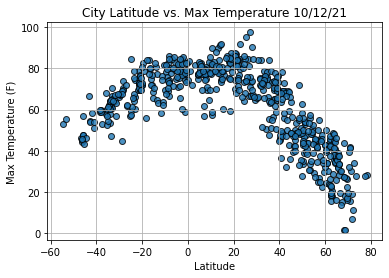

In [13]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

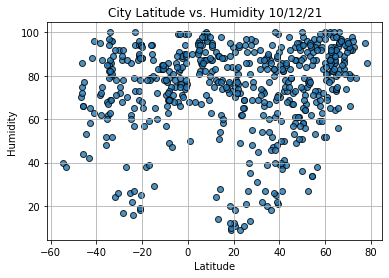

In [14]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

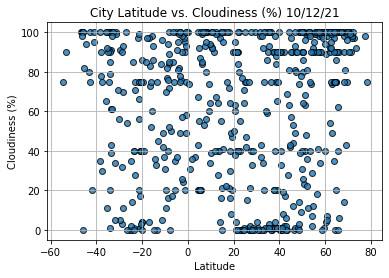

In [16]:
# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

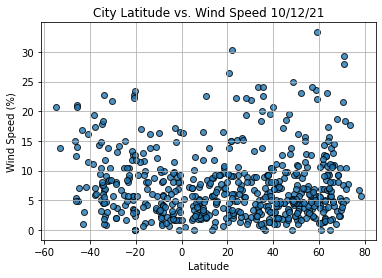

In [17]:
# Build the scatter plot for latitude vs. Wind Speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()